In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [0]:
img_width, img_height = 64, 64

In [0]:
PTmodel = VGG16(weights='imagenet',include_top=False,input_shape=(img_width, img_height, 3))

In [141]:
print(PTmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [0]:
train_size, validation_size = 5835, 529

In [0]:
from keras.applications.vgg16 import preprocess_input

In [0]:
train_path='/content/drive/My Drive/data/data_train'
validation_path='/content/drive/My Drive/data/data_val'
test_path='/content/drive/My Drive/data/data_test'

In [0]:
# train_data = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input).flow_from_directory(train_path,target_size = (224,224),batch_size = 8)

In [0]:
# val_data = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input).flow_from_directory(validation_path,target_size = (224,224),batch_size = 8)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 2, 2, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = PTmodel.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [146]:
train_features, train_labels = extract_features(train_path, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_path, validation_size)
# test_features, test_labels = extract_features(test_dir, test_size)


# x = PTmodel.layers[-6].output

Found 5835 images belonging to 2 classes.
Found 529 images belonging to 2 classes.


In [147]:
print(train_features)
print(train_labels)

[[[[1.41397142 0.         1.82507324 ... 0.         1.21562958
    0.        ]
   [1.86833274 0.         1.6195128  ... 0.18798652 1.19375515
    0.        ]]

  [[1.17409348 0.         1.11537087 ... 0.         1.21588874
    0.        ]
   [1.54344761 0.         1.16420484 ... 0.         1.20637238
    0.        ]]]


 [[[0.81570578 0.         0.66731828 ... 0.40933552 0.67965275
    0.        ]
   [0.31772637 0.         1.08923578 ... 0.11137251 0.87465179
    0.        ]]

  [[1.10378742 0.         0.66766268 ... 0.89637154 0.50968099
    0.        ]
   [0.48547238 0.         0.75190282 ... 0.59712344 0.93797934
    0.        ]]]


 [[[1.23163629 0.         1.2672658  ... 0.         0.72561771
    0.        ]
   [1.24394429 0.         1.29034376 ... 0.         1.21058071
    0.        ]]

  [[1.07243431 0.         1.07966685 ... 0.01070134 0.39613062
    0.        ]
   [1.1257621  0.         0.82561094 ... 0.         1.07894731
    0.        ]]]


 ...


 [[[0.99728662 0.         0

In [0]:
# Predictions= Dense(2, activation = 'sigmoid')(x)

In [0]:
# print(PTmodel.summary())

In [0]:
# PTmodel = Model(inputs = PTmodel.input,outputs = Predictions)
# print(PTmodel.summary())


In [0]:
# PTmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [148]:
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

Cmodel = models.Sequential()
Cmodel.add(layers.Flatten(input_shape=(2,2,512)))
Cmodel.add(layers.Dropout(0.5))
Cmodel.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
Cmodel.add(layers.Dropout(0.5))
Cmodel.add(layers.Dense(2, activation='softmax'))
Cmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 525,058
Trainable params: 525,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
Cmodel.compile(optimizer=optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['acc'])
# for layer in PTmodel.layers[:-1]:
#    layer.Trainable = False(lr =0.001)

In [0]:
# PTmodel= (x_train.shape[1:], len(set(y_train)),'relu')

In [150]:
history = Cmodel.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

ValueError: ignored

In [0]:
# history = PTmodel.fit_generator(train_data,steps_per_epoch =804 , validation_data = val_data, validation_steps = 70,epochs = 10,verbose = 1 )

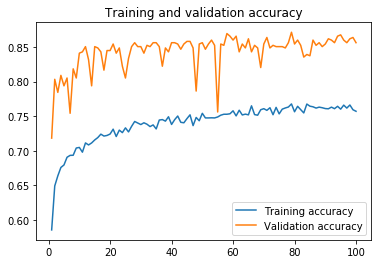

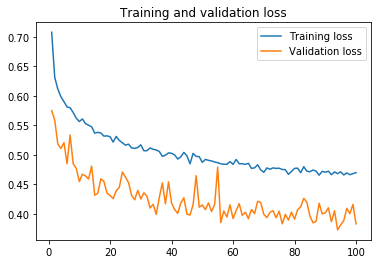

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

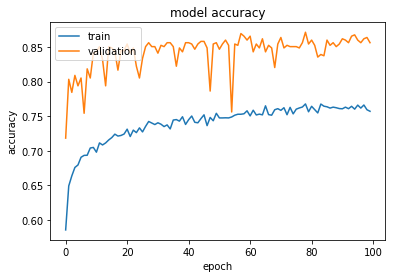

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

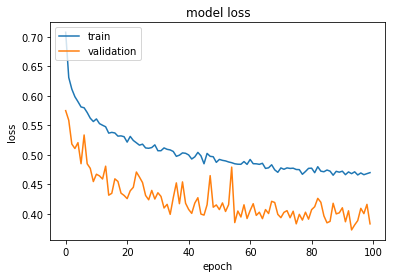

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [88]:
test_data=ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary',
                                            shuffle=False)

Found 576 images belonging to 2 classes.


In [0]:
test_labels=test_data.classes

In [90]:
print(test_data.class_indices)
print(test_labels)


{'Plants': 0, 'Weed': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [164]:
predictions=PTmodel.predict_generator(test_data,steps=18, verbose=1)

18/18 [==============================] - 2s 101ms/step


In [166]:
print(len(predictions))
print(predictions)

576
[[[[0.073789   0.         1.8595128  ... 0.12051869 0.7445313
    0.        ]
   [0.7123978  0.         2.1351445  ... 0.10030762 0.8357468
    0.        ]]

  [[0.         0.         1.1620369  ... 0.5821373  0.962089
    0.        ]
   [0.6575693  0.         1.3828931  ... 0.12710288 0.3752904
    0.        ]]]


 [[[2.0152225  0.         2.742386   ... 0.         0.8363518
    0.        ]
   [1.7970133  0.         2.8060336  ... 0.         1.0603719
    0.        ]]

  [[2.1309943  0.         2.1074576  ... 0.         0.743707
    0.        ]
   [1.9682305  0.         2.2932038  ... 0.         0.8810471
    0.        ]]]


 [[[2.2876532  0.         1.9078114  ... 0.         0.2568239
    0.        ]
   [2.1408863  0.         2.0425582  ... 0.         0.87128633
    0.        ]]

  [[1.7233353  0.         1.1660279  ... 0.         0.49882072
    0.        ]
   [1.3930048  0.         1.2837992  ... 0.         0.5729896
    0.        ]]]


 ...


 [[[2.4352434  0.         1.303191 

In [0]:
final_predictions = Cmodel.predict(predictions)

In [201]:
print(final_predictions)
print(final_predictions[0].argmax())

results=[]
for i in range(0,len(final_predictions)):
  results.append(final_predictions[i].argmax())

[[0.41791075 0.58208925]
 [0.4541098  0.5458902 ]
 [0.43455693 0.56544304]
 ...
 [0.2559415  0.7440585 ]
 [0.49681777 0.50318223]
 [0.43455693 0.56544304]]
1


In [206]:
print(results)
print(len(results))
new_results=np.asarray(results)
print(new_results.shape)
print(test_labels.shape)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,new_results)

In [0]:
from sklearn.metrics import accuracy_score

In [210]:
print(accuracy_score(test_labels,new_results))

0.5069444444444444


In [111]:
accuracy_score(test_labels, np.round(predictions), normalize=False, sample_weight=None)
((y_pred_round == y_true).all(axis=1).sum() / y_pred_round.shape[0])

ValueError: ignored

In [0]:
img_path='/content/drive/My Drive/data/data_test/Plants/plant237_1_18.png'

In [0]:
img = image.load_img(img_path, target_size=(img_width, img_height))
img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
img_tensor /= 255.  # Normalize to [0,1] for plt.imshow applic

In [0]:
features = PTmodel.predict(img_tensor.reshape(1,img_width, img_height, 3))

In [157]:
print(features)

[[[[3.2005315  0.         0.9371269  ... 0.         0.6089536
    0.        ]
   [3.2033167  0.         0.8759953  ... 0.         0.2843661
    0.        ]]

  [[2.8096335  0.         0.7547393  ... 0.         0.97313404
    0.        ]
   [2.825391   0.         0.78069496 ... 0.         0.1095916
    0.        ]]]]


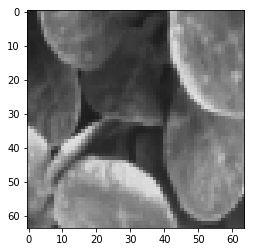

ValueError: ignored

In [162]:
try:
    prediction = Cmodel.predict(features)
except:
    prediction = Cmodel.predict(features.reshape(1, 7*7*512))

# Show picture
plt.imshow(img_tensor)
plt.show()

# Write prediction
if prediction < 0.5:
    print('Cat')
else:
    print('Dog')